# Chapter 04 코로나 바이러스 감염 현황 분석 2

In [ ]:
## 드라이브 마운트 하기


/content/drive/MyDrive/빅데이터분석(중핵) 2분반


In [20]:
# 판다스 라이브러리 불러오기
import pandas as pd

###1. csv파일 탑재하고 정보 알아내기

In [21]:
# 수집된 하와이 데이터 csv파일 탑재하기(csv파일을 불러와 hawaii 변수에 할당하기)
hawaii = pd.read_csv('hawaii_covid_data.csv')

In [22]:
# 탑재한 내용 확인하기
hawaii

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,HI,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,HI,01/23/2020,01/29/2020,0,0,0,0,0,0
2,02/06/2020,HI,01/30/2020,02/05/2020,0,0,0,0,0,0
3,02/13/2020,HI,02/06/2020,02/12/2020,0,0,0,0,0,0
4,02/20/2020,HI,02/13/2020,02/19/2020,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
168,04/13/2023,HI,04/06/2023,04/12/2023,371120,932,1833,4,0,0
169,04/20/2023,HI,04/13/2023,04/19/2023,372029,909,1842,9,0,0
170,04/27/2023,HI,04/20/2023,04/26/2023,372862,833,1847,5,0,0
171,05/04/2023,HI,04/27/2023,05/03/2023,373610,748,1852,5,0,0


In [23]:
# 데이터 프레임 정보 알아내기
hawaii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         173 non-null    object
 1   state                173 non-null    object
 2   start_date           173 non-null    object
 3   end_date             173 non-null    object
 4   tot_cases            173 non-null    int64 
 5   new_cases            173 non-null    int64 
 6   tot_deaths           173 non-null    int64 
 7   new_deaths           173 non-null    int64 
 8   new_historic_cases   173 non-null    int64 
 9   new_historic_deaths  173 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 13.6+ KB


In [24]:
# 결측값 확인해보기
hawaii.isnull().sum()

date_updated           0
state                  0
start_date             0
end_date               0
tot_cases              0
new_cases              0
tot_deaths             0
new_deaths             0
new_historic_cases     0
new_historic_deaths    0
dtype: int64

###2. 필요한 열 추출 및 열이름 변경

In [25]:
# 필요한 열 추출하기
# (1) 열 정보 추출하기
hawaii.columns

Index(['date_updated', 'state', 'start_date', 'end_date', 'tot_cases',
       'new_cases', 'tot_deaths', 'new_deaths', 'new_historic_cases',
       'new_historic_deaths'],
      dtype='object')

In [26]:
# (2) 필요한 열 추출하기
hawaii = hawaii[["end_date","tot_cases"]]

In [27]:
# 하와이 데이터의 열제목 변경하기(date, total_cases로)
hawaii.rename(columns = {"end_date":'date',"tot_cases":"total_cases"},inplace = True)

C:\Users\loly1\AppData\Local\Temp\ipykernel_19968\1113142964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hawaii.rename(columns = {"end_date":'date',"tot_cases":"total_cases"},inplace = True)


In [29]:
hawaii

,date,total_cases
0,01/22/2020,0
1,01/29/2020,0
2,02/05/2020,0
3,02/12/2020,0
4,02/19/2020,0
...,...,...
168,04/12/2023,371120
169,04/19/2023,372029
170,04/26/2023,372862
171,05/03/2023,373610


###3. 하와이 인구대비 확진자수 구하기 --> date를 날짜 형식 변경

In [ ]:
# 하와이의 인구대비 확진자 비율 구하여 'RATE'열에 할당하기
# 하와이 날짜기준으로 데이터를 새로 만들 필요가 있음.
# 하와이 데이터는 날짜가 문자열 타입으로 되어있음 --> 날짜 형식으로 만들어야 함.

In [31]:
# 하와이 데이터의 날짜를 날짜 타입으로 변경하기
# (1) date열을 날짜 형식으로 변경해보기
hawaii.date = pd.to_datetime(hawaii.date)

C:\Users\loly1\AppData\Local\Temp\ipykernel_19968\2715171693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hawaii.date = pd.to_datetime(hawaii.date)


In [32]:
# (3) 하와이 데이터 확인 후 정보 확인하기
hawaii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         173 non-null    datetime64[ns]
 1   total_cases  173 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


##4. kor_usa.csv파일 탑재 후 date열을 날짜 형식으로 변겅


In [33]:
# 지난시간 결과물인 kor_usa.csv파일 탑재하기
kor_usa =  pd.read_csv('kor_usa.csv')

In [34]:
# kor_usa 데이터 정보 확인하기
kor_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1362 non-null   object 
 1   KOR       1362 non-null   float64
 2   USA       1362 non-null   float64
 3   KOR_RATE  1362 non-null   float64
 4   USA_RATE  1362 non-null   float64
dtypes: float64(4), object(1)
memory usage: 53.3+ KB


In [36]:
# date열을 날짜형식으로 변경
kor_usa.date = pd.to_datetime(kor_usa.date)

In [37]:
# kor_usa의 정보보기
kor_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1362 non-null   datetime64[ns]
 1   KOR       1362 non-null   float64       
 2   USA       1362 non-null   float64       
 3   KOR_RATE  1362 non-null   float64       
 4   USA_RATE  1362 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 53.3 KB


###5. date열을 인덱스로 변경, 하와이 연도별 인구대비 확진자 수 구하기
###--> for 두개의 데이터프레임 병합

In [38]:
# kor_usa, hawaii 데이터프레임 index를 'date'로 변경
kor_usa.set_index("date",inplace = True)
hawaii.set_index("date",inplace = True)

In [40]:
hawaii

,total_cases
date,
2020-01-22,0
2020-01-29,0
2020-02-05,0
2020-02-12,0
2020-02-19,0
...,...
2023-04-12,371120
2023-04-19,372029
2023-04-26,372862


In [ ]:
# 하와이 데이터 연도별 인구대비 확진자 수 구하기
# 연도별 인구수 알아내기 2020: , 2021: , 2022:
# 하와이 인구(2020, 2021, 2022) : 1451043, 1447154, 1440196
# 하와이 데이터의 특징은? 주별로 통계가 매김됨

In [41]:
# 연도를 조건으로 행 추출해보기
hawaii.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='date', length=173)

In [42]:
# 연도별 인구대비 확진자수 구하여 'HI_RATE'열에 할당하기
hawaii['HI_RATE'] = hawaii[hawaii.index.year==2020]['total_cases'] / 1451043

C:\Users\loly1\AppData\Local\Temp\ipykernel_19968\2526664725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hawaii['HI_RATE'] = hawaii[hawaii.index.year==2020]['total_cases'] / 1451043


In [ ]:
# 연도별 인구대비 확진자수 구하여 'HI_RATE'열에 할당하기(loc이용 )


In [52]:
# 앞에서 20개 데이터 확인해보기
hawaii.head(20)

,total_cases,HI_RATE
date,,
2020-01-22,0,0.000000
2020-01-29,0,0.000000
2020-02-05,0,0.000000
2020-02-12,0,0.000000
2020-02-19,0,0.000000
2020-02-26,0,0.000000
2020-03-04,0,0.000000
2020-03-11,4,0.000003
2020-03-18,19,0.000013


In [48]:
# 인구대비 확진자수 모두 계산하기(2021, 2022, 2023-2022인구로)
hawaii.loc[hawaii.index.year==2021,'HI_RATE'] = hawaii.total_cases / 1451043
hawaii.loc[hawaii.index.year==2021,'HI_RATE'] = hawaii.total_cases / 1447154
hawaii.loc[hawaii.index.year==2022,'HI_RATE'] = hawaii.total_cases / 1440196
hawaii.loc[hawaii.index.year==2023,'HI_RATE'] = hawaii.total_cases / 1440196

In [49]:
# 하와이 데이터 확인하기
hawaii.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2020-01-22 to 2023-05-10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_cases  173 non-null    int64  
 1   HI_RATE      173 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.1 KB


###5. 하와이 날짜를 기준으로 새로운 데이터 프레임 생성

In [50]:
# kor_usa_hi 데이터 프레임 생성하기(인구대비 확진자 수)
kor_usa_hi = pd.DataFrame({"KOR":kor_usa.KOR_RATE,"USA":kor_usa.USA_RATE,"HI":hawaii.HI_RATE})

In [51]:
# kor_usa_hi 데이터 확인하기
kor_usa_hi

,KOR,USA,HI
date,,,
2020-01-20,0.00000,0.00000,NaN
2020-01-21,0.00000,0.00000,NaN
2020-01-22,0.00000,0.00000,0.0
2020-01-23,0.00000,0.00000,NaN
2020-01-24,0.00000,0.00000,NaN
...,...,...,...
2023-10-08,0.66721,0.30576,NaN
2023-10-09,0.66721,0.30576,NaN
2023-10-10,0.66721,0.30576,NaN


In [53]:
kor_usa_hi.dropna(inplace = True)
kor_usa_hi

,KOR,USA,HI
date,,,
2020-01-22,0.00000,0.00000,0.000000
2020-01-29,0.00000,0.00000,0.000000
2020-02-05,0.00000,0.00000,0.000000
2020-02-12,0.00000,0.00000,0.000000
2020-02-19,0.00000,0.00000,0.000000
...,...,...,...
2023-04-12,0.59720,0.30441,0.257687
2023-04-19,0.59877,0.30471,0.258318
2023-04-26,0.60049,0.30500,0.258897


# 데이터 시각화

<AxesSubplot:xlabel='date'>

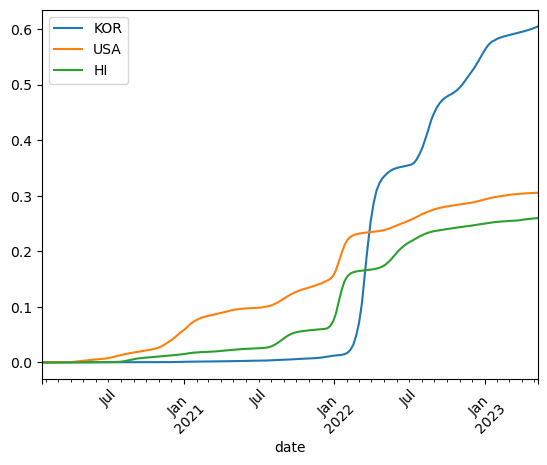

In [54]:
# 시각화 하기
kor_usa_hi.plot(rot=45)

<AxesSubplot:xlabel='date'>

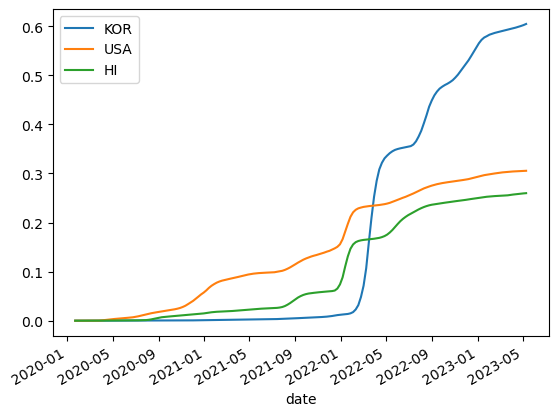

In [57]:
# x축 항목 숫자로 된 날짜형식으로 변경하기
kor_usa_hi.plot(x_compat = True)

<AxesSubplot:xlabel='date'>

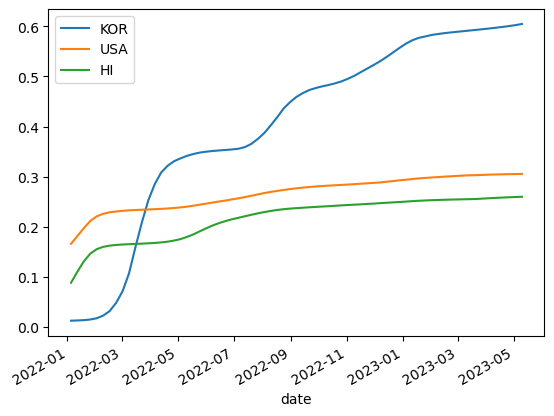

In [58]:
# 원하는 날짜로 x축 범위 좁히기(2022년 부터)
kor_usa_hi['2022-01':].plot(x_compat = True)